In [1]:
from pulp import LpProblem, LpVariable, LpMaximize, LpStatus, lpSum
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import math
from itertools import product

In [2]:
print(glob('../*/*school/*.csv'))
students_df = pd.read_csv(glob('../*/*school/students.csv')[0])
student_pairs_df = pd.read_csv(glob('../*/*school/student_pairs.csv')[0])

['..\\PyOptBook-main\\3.school\\students.csv', '..\\PyOptBook-main\\3.school\\student_pairs.csv']


In [3]:
display(students_df.head(3))
student_pairs_df.head(3)

,student_id,gender,leader_flag,support_flag,score
0,1,0,0,0,335
1,2,1,0,0,379
2,3,0,0,0,350


,student_id1,student_id2
0,118,189
1,72,50
2,314,233


In [4]:
# Students list
S = students_df['student_id'].to_list()
# Class list
MAX_CLASS_NUM = 40
class_num = math.ceil(len(S) / MAX_CLASS_NUM)
C = [chr(65+i) for i in range(class_num)]
# Pairing Students and Class
SC = list(product(S, C))
# Men list
S_male = students_df['student_id'][students_df['gender'] == 1].to_list()
# Wemen list
S_female = students_df['student_id'][students_df['gender'] == 0].to_list()
# Student Grades and mean
score = {row.student_id: row.score for row in students_df.itertuples()}
score_mean = students_df['score'].mean()
# Leader list
S_leader = students_df['student_id'][students_df['leader_flag'] == 1].to_list()
# Support list
S_support = students_df['student_id'][students_df['support_flag'] == 1].to_list()
# Specific Pairs
S_specific = [(row.student_id1, row.student_id2) for row in student_pairs_df.itertuples()]

In [5]:
# variable
x = LpVariable.dicts('x', SC, cat='Binary')

# 数理モデルの定義
prob = LpProblem('class', sense=LpMaximize)
# 生徒ごとの制約条件
for s in S:
    # 必ず1つのクラスに1人割り当てる
    prob += lpSum(x[s, c] for c in C) == 1

# クラスごとの制約条件
for c in C:
    # クラスの上下限の人数
    prob += lpSum(x[s, c] for s in S) >= 39
    prob += lpSum(x[s, c] for s in S) <= 40
    # 男女の人数
    prob += lpSum(x[s, c] for s in S_male) <= 20
    prob += lpSum(x[s, c] for s in S_female) <= 20
    # クラス平均点が全体平均点の±10以下
    prob += (score_mean - 10) * lpSum([x[s, c] for s in S]) <= lpSum([x[s, c] * score[s] for s in S])
    prob += (score_mean + 10) * lpSum([x[s, c] for s in S]) >= lpSum([x[s, c] * score[s] for s in S])
    # Two leaders
    prob += lpSum(x[s, c] for s in S_leader) >= 2
    # One support
    prob += lpSum(x[s, c] for s in S_support) <= 1

# 特定ペアの制約条件
for s1, s2 in S_specific:
    for c in C:
        prob += x[s1, c] + x[s2, c] <= 1

status = prob.solve()
print(LpStatus[status])

Optimal


In [6]:
C2Ss = {}
for c in C:
    C2Ss[c] = [s for s in S if x[s, c].value() == 1]
for class_, id_ in C2Ss.items():
    print(class_, len(id_), id_)
C2Ss

A 39 [2, 9, 11, 19, 39, 42, 63, 65, 71, 79, 83, 85, 88, 99, 109, 111, 123, 126, 136, 138, 145, 148, 165, 168, 173, 177, 179, 180, 193, 199, 206, 224, 233, 240, 264, 267, 291, 292, 298]
B 39 [15, 43, 48, 50, 70, 82, 89, 91, 102, 104, 113, 114, 120, 121, 124, 127, 134, 146, 149, 159, 167, 170, 176, 190, 203, 213, 220, 222, 231, 238, 245, 263, 270, 275, 276, 283, 287, 312, 317]
C 40 [3, 14, 23, 25, 27, 31, 33, 41, 49, 53, 54, 58, 73, 93, 97, 98, 107, 122, 142, 152, 156, 160, 171, 187, 210, 211, 217, 219, 227, 236, 242, 254, 258, 260, 268, 273, 277, 278, 301, 318]
D 40 [13, 16, 36, 37, 51, 56, 59, 61, 67, 68, 75, 84, 92, 108, 128, 139, 140, 158, 161, 175, 183, 192, 198, 200, 205, 218, 221, 225, 241, 246, 252, 255, 256, 257, 261, 266, 284, 293, 308, 316]
E 40 [5, 10, 21, 22, 24, 38, 69, 72, 78, 87, 96, 105, 106, 115, 129, 132, 141, 143, 150, 154, 164, 166, 184, 189, 195, 196, 197, 212, 243, 244, 247, 249, 269, 271, 288, 300, 305, 309, 310, 315]
F 40 [1, 4, 12, 17, 45, 46, 74, 76, 80, 95, 10

{'A': [2,
  9,
  11,
  19,
  39,
  42,
  63,
  65,
  71,
  79,
  83,
  85,
  88,
  99,
  109,
  111,
  123,
  126,
  136,
  138,
  145,
  148,
  165,
  168,
  173,
  177,
  179,
  180,
  193,
  199,
  206,
  224,
  233,
  240,
  264,
  267,
  291,
  292,
  298],
 'B': [15,
  43,
  48,
  50,
  70,
  82,
  89,
  91,
  102,
  104,
  113,
  114,
  120,
  121,
  124,
  127,
  134,
  146,
  149,
  159,
  167,
  170,
  176,
  190,
  203,
  213,
  220,
  222,
  231,
  238,
  245,
  263,
  270,
  275,
  276,
  283,
  287,
  312,
  317],
 'C': [3,
  14,
  23,
  25,
  27,
  31,
  33,
  41,
  49,
  53,
  54,
  58,
  73,
  93,
  97,
  98,
  107,
  122,
  142,
  152,
  156,
  160,
  171,
  187,
  210,
  211,
  217,
  219,
  227,
  236,
  242,
  254,
  258,
  260,
  268,
  273,
  277,
  278,
  301,
  318],
 'D': [13,
  16,
  36,
  37,
  51,
  56,
  59,
  61,
  67,
  68,
  75,
  84,
  92,
  108,
  128,
  139,
  140,
  158,
  161,
  175,
  183,
  192,
  198,
  200,
  205,
  218,
  221,
  225,
  241,
  

In [7]:
for s in S:
    assigned_class = [c for c in C if x[s, c].value() == 1]
    if len(assigned_class) != 1:
        print(assigned_class, s)

In [8]:
S2C = {s: c for s in S for c in C if x[s, c].value() == 1}
result_df = students_df.copy()
result_df['assigned_class'] = result_df['student_id'].map(S2C)

In [9]:
result_df.groupby(['assigned_class']).count()

,student_id,gender,leader_flag,support_flag,score
assigned_class,,,,,
A,39,39,39,39,39
B,39,39,39,39,39
C,40,40,40,40,40
D,40,40,40,40,40
E,40,40,40,40,40
F,40,40,40,40,40
G,40,40,40,40,40
H,40,40,40,40,40


In [10]:
result_df.groupby(['assigned_class', 'gender']).count()

student_id  leader_flag  support_flag  score
assigned_class gender                                              
A              0               20           20            20     20
               1               19           19            19     19
B              0               20           20            20     20
               1               19           19            19     19
C              0               20           20            20     20
               1               20           20            20     20
D              0               20           20            20     20
               1               20           20            20     20
E              0               20           20            20     20
               1               20           20            20     20
F              0               20           20            20     20
               1               20           20            20     20
G              0               20           20            20     20
               1               20           20            20     20
H              0               20           20            20     20
               1               20           20            20     20

In [11]:
result_df.groupby(['assigned_class', 'leader_flag']).count()

student_id  gender  support_flag  score
assigned_class leader_flag                                         
A              0                    36      36            36     36
               1                     3       3             3      3
B              0                    37      37            37     37
               1                     2       2             2      2
C              0                    38      38            38     38
               1                     2       2             2      2
D              0                    38      38            38     38
               1                     2       2             2      2
E              0                    38      38            38     38
               1                     2       2             2      2
F              0                    38      38            38     38
               1                     2       2             2      2
G              0                    38      38            38     38
               1                     2       2             2      2
H              0                    38      38            38     38
               1                     2       2             2      2

In [12]:
result_df.groupby(['assigned_class', 'support_flag']).count()

student_id  gender  leader_flag  score
assigned_class support_flag                                        
A              0                     39      39           39     39
B              0                     38      38           38     38
               1                      1       1            1      1
C              0                     39      39           39     39
               1                      1       1            1      1
D              0                     40      40           40     40
E              0                     39      39           39     39
               1                      1       1            1      1
F              0                     40      40           40     40
G              0                     39      39           39     39
               1                      1       1            1      1
H              0                     40      40           40     40

In [13]:
result_df.groupby(['assigned_class']).mean() - score_mean

,student_id,gender,leader_flag,support_flag,score
assigned_class,,,,,
A,-161.593372,-303.157475,-303.567731,-303.644654,9.534833
B,-135.465167,-303.157475,-303.593372,-303.619013,-8.208757
C,-153.194654,-303.144654,-303.594654,-303.619654,8.080346
D,-138.619654,-303.144654,-303.594654,-303.644654,4.430346
E,-139.894654,-303.144654,-303.594654,-303.619654,-9.319654
F,-150.444654,-303.144654,-303.594654,-303.644654,-8.169654
G,-140.344654,-303.144654,-303.594654,-303.619654,9.205346
H,-133.819654,-303.144654,-303.594654,-303.644654,-5.519654


In [14]:
for i, (s1, s2) in enumerate(S_specific):
    c1 = S2C[s1]
    c2 = S2C[s2]
    if c1 != c2:
        print(f'id {s1} class: {c1}, id {s2} class: {c2}')

id 118 class: G, id 189 class: E
id 72 class: E, id 50 class: B
id 314 class: H, id 233 class: A


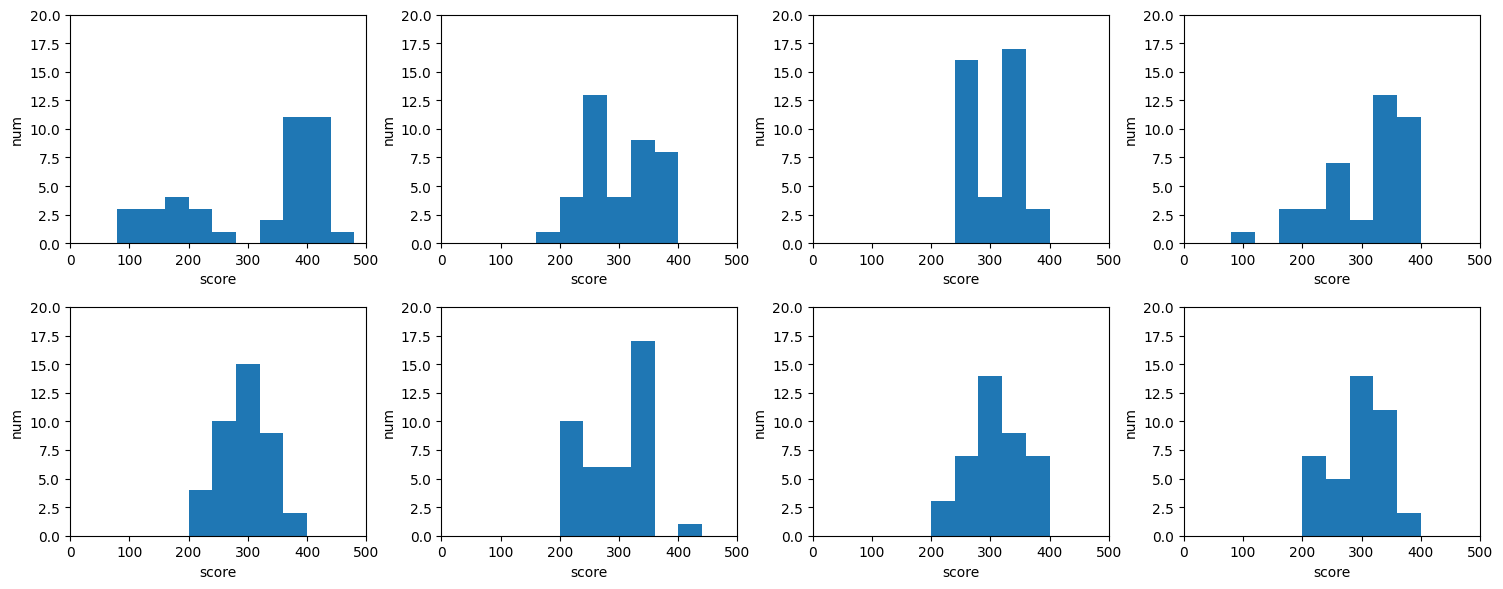

In [15]:
fig, axs = plt.subplots(2, 4, figsize=(15, 6))
pos = 0
for i in range(2):
    for j in range(4):
        axs[i][j].hist(result_df['score'][result_df['assigned_class'] == chr(65+pos)], bins=range(0, 500, 40))
        axs[i][j].set_xlim(0, 500)
        axs[i][j].set_ylim(0, 20)
        axs[i][j].set_xlabel('score')
        axs[i][j].set_ylabel('num')
        pos += 1
plt.tight_layout()
plt.show()

In [16]:
# 成績順に初期クラスを設定

# print(glob('../*/*school/*.csv'))
students_df = pd.read_csv(glob('../*/*school/students.csv')[0])
student_pairs_df = pd.read_csv(glob('../*/*school/student_pairs.csv')[0])

# Students list
S = students_df['student_id'].to_list()
# Class list
MAX_CLASS_NUM = 40
class_num = math.ceil(len(S) / MAX_CLASS_NUM)
C = [chr(65+i) for i in range(class_num)]
# Pairing Students and Class
SC = list(product(S, C))
# Men list
S_male = students_df['student_id'][students_df['gender'] == 1].to_list()
# Wemen list
S_female = students_df['student_id'][students_df['gender'] == 0].to_list()
# Student Grades and mean
score = {row.student_id: row.score for row in students_df.itertuples()}
score_mean = students_df['score'].mean()
# Leader list
S_leader = students_df['student_id'][students_df['leader_flag'] == 1].to_list()
# Support list
S_support = students_df['student_id'][students_df['support_flag'] == 1].to_list()
# Specific Pairs
S_specific = [(row.student_id1, row.student_id2) for row in student_pairs_df.itertuples()]

# initial class
students_df['rank'] = students_df['score'].rank(ascending=False, method='first')
class_dict = {i:c for i, c in enumerate(C)}
students_df['init_assigned_class'] = students_df['rank'].map(lambda x: x % 8).map(class_dict)
# initial flag
init_flag = {(s, c): 0 for s in S for c in C}
for row in students_df.itertuples():
    init_flag[row.student_id, row.init_assigned_class] = 1

# variable
x = LpVariable.dicts('x', SC, cat='Binary')

# 数理モデルの定義
prob = LpProblem('class', sense=LpMaximize)
# 生徒ごとの制約条件
for s in S:
    # 必ず1つのクラスに1人割り当てる
    prob += lpSum(x[s, c] for c in C) == 1

# クラスごとの制約条件
for c in C:
    # クラスの上下限の人数
    prob += lpSum(x[s, c] for s in S) >= 39
    prob += lpSum(x[s, c] for s in S) <= 40
    # 男女の人数
    prob += lpSum(x[s, c] for s in S_male) <= 20
    prob += lpSum(x[s, c] for s in S_female) <= 20
    # クラス平均点が全体平均点の±10以下
    prob += (score_mean - 10) * lpSum([x[s, c] for s in S]) <= lpSum([x[s, c] * score[s] for s in S])
    prob += (score_mean + 10) * lpSum([x[s, c] for s in S]) >= lpSum([x[s, c] * score[s] for s in S])
    # Two leaders
    prob += lpSum(x[s, c] for s in S_leader) >= 2
    # One support
    prob += lpSum(x[s, c] for s in S_support) <= 1

# 初期クラスを優先する
prob += lpSum([x[s, c] * init_flag[s, c] for s, c in SC])

# 特定ペアの制約条件
for s1, s2 in S_specific:
    for c in C:
        prob += x[s1, c] + x[s2, c] <= 1

status = prob.solve()
print(LpStatus[status])

Optimal


In [17]:
students_df

,student_id,gender,leader_flag,support_flag,score,rank,init_assigned_class
0,1,0,0,0,335,109.0,F
1,2,1,0,0,379,38.0,G
2,3,0,0,0,350,79.0,H
3,4,0,0,0,301,172.0,E
4,5,1,0,0,317,147.0,D
...,...,...,...,...,...,...,...
313,314,0,0,0,244,263.0,H
314,315,1,0,0,309,162.0,C
315,316,0,0,0,239,272.0,A
316,317,1,0,0,356,63.0,H


In [18]:
C2Ss = {}
for c in C:
    C2Ss[c] = [s for s in S if x[s, c].value() == 1]
for class_, id_ in C2Ss.items():
    print(class_, len(id_), id_)

A 40 [2, 23, 56, 68, 76, 82, 89, 102, 106, 113, 115, 121, 123, 124, 127, 140, 172, 173, 185, 186, 204, 210, 228, 255, 267, 273, 274, 280, 285, 288, 289, 292, 295, 297, 304, 308, 311, 313, 316, 318]
B 39 [11, 14, 17, 30, 32, 35, 41, 49, 64, 66, 79, 83, 86, 88, 97, 114, 119, 122, 132, 134, 141, 149, 151, 165, 175, 178, 190, 198, 200, 209, 213, 216, 226, 237, 272, 296, 303, 306, 307]
C 40 [21, 38, 44, 46, 51, 54, 62, 63, 73, 75, 84, 85, 99, 120, 138, 142, 143, 144, 150, 166, 183, 184, 192, 193, 195, 201, 205, 207, 211, 212, 217, 221, 222, 243, 244, 263, 264, 287, 299, 315]
D 40 [5, 24, 39, 47, 50, 61, 67, 74, 90, 92, 93, 100, 109, 116, 131, 136, 147, 152, 155, 167, 169, 170, 176, 177, 196, 199, 214, 218, 219, 227, 230, 231, 236, 238, 239, 253, 257, 259, 271, 309]
E 39 [4, 8, 12, 13, 19, 22, 33, 43, 48, 55, 57, 59, 98, 112, 125, 130, 133, 137, 139, 153, 160, 189, 203, 234, 235, 240, 241, 249, 251, 254, 256, 261, 266, 268, 276, 283, 291, 294, 302]
F 40 [1, 6, 16, 27, 28, 29, 40, 42, 45, 58,

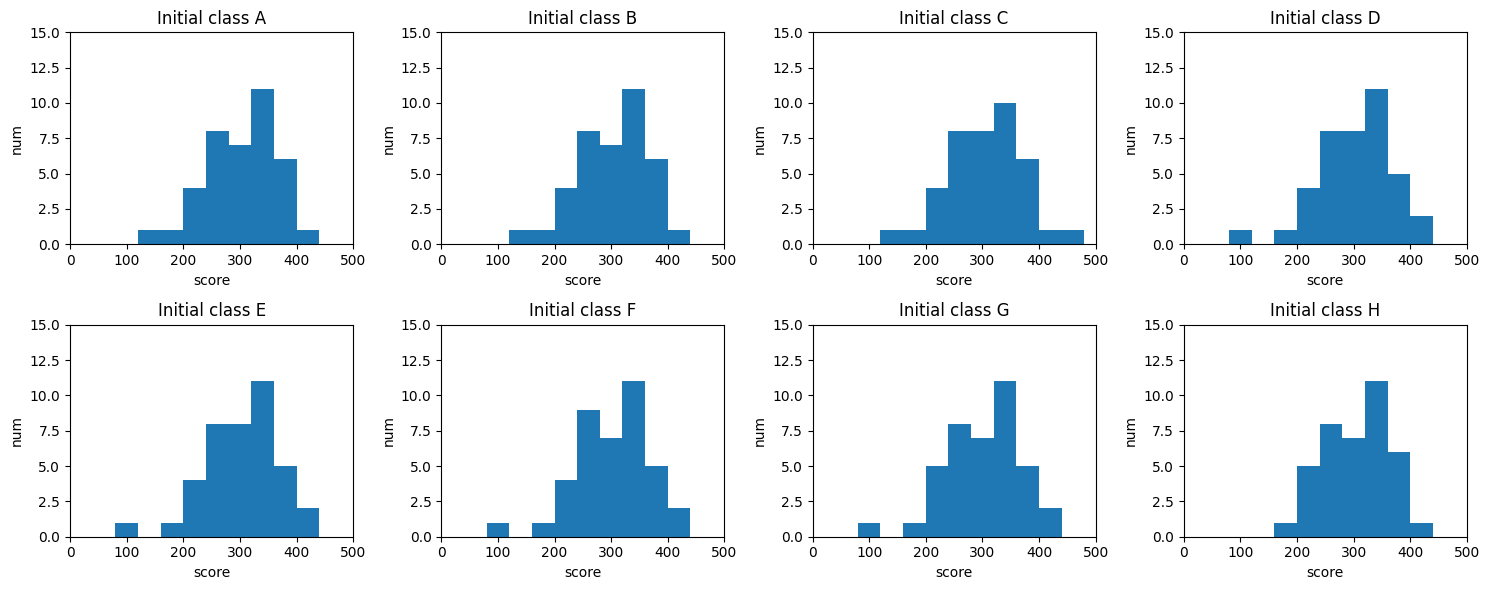

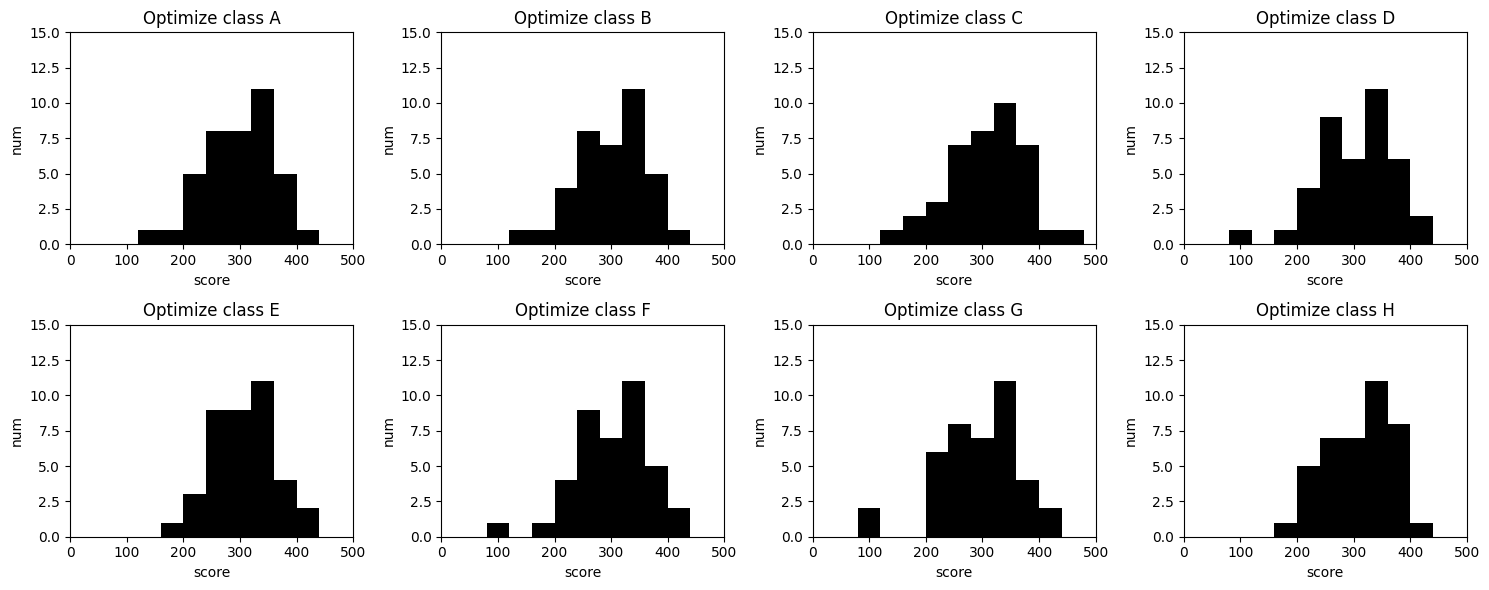

In [19]:
fig, axs = plt.subplots(2, 4, figsize=(15, 6))
pos = 0
for i in range(2):
    for j in range(4):
        axs[i][j].hist(students_df['score'][students_df['init_assigned_class'] == chr(65+pos)], bins=range(0, 500, 40))
        axs[i][j].set_xlim(0, 500)
        axs[i][j].set_ylim(0, 15)
        axs[i][j].set_xlabel('score')
        axs[i][j].set_ylabel('num')
        axs[i][j].set_title(f'Initial class {chr(65+pos)}')
        pos += 1
plt.tight_layout()
plt.show()

S2C = {s: c for s in S for c in C if x[s, c].value() == 1}
result_df = students_df.copy()
result_df['assigned_class'] = result_df['student_id'].map(S2C)

fig, axs = plt.subplots(2, 4, figsize=(15, 6))
pos = 0
for i in range(2):
    for j in range(4):
        axs[i][j].hist(result_df['score'][result_df['assigned_class'] == chr(65+pos)], bins=range(0, 500, 40), color='k')
        axs[i][j].set_xlim(0, 500)
        axs[i][j].set_ylim(0, 15)
        axs[i][j].set_xlabel('score')
        axs[i][j].set_ylabel('num')
        axs[i][j].set_title(f'Optimize class {chr(65+pos)}')
        pos += 1
plt.tight_layout()
plt.show()